In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Stock price prediction/stock_data.csv")

In [ ]:
df.head()

,index,DATE,TRADINGCODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE(mn),VOLUME
0,0,2020-12-01,1JANATAMF,6.1,6.3,6.1,6.2,6.1,6.2,304,9.311,"1,503,031"
1,1,2020-11-30,1JANATAMF,6.2,6.5,6.1,6.5,6.2,6.4,539,16.332,"2,617,333"
2,2,2020-11-29,1JANATAMF,6.4,6.7,6.3,6.5,6.4,6.5,453,19.140,"2,953,085"
3,3,2020-11-26,1JANATAMF,6.5,6.7,6.3,6.5,6.5,6.3,497,22.492,"3,467,374"
4,4,2020-11-25,1JANATAMF,6.3,6.7,6.2,6.7,6.3,6.6,576,26.917,"4,201,219"


In [ ]:
df['DATE'] = pd.to_datetime(df.DATE)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770 entries, 0 to 2769
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        2770 non-null   int64         
 1   DATE         2770 non-null   datetime64[ns]
 2   TRADINGCODE  2770 non-null   object        
 3   LTP*         2770 non-null   float64       
 4   HIGH         2770 non-null   float64       
 5   LOW          2770 non-null   float64       
 6   OPENP*       2770 non-null   float64       
 7   CLOSEP*      2770 non-null   float64       
 8   TRADE        2770 non-null   object        
 9   VOLUME       2770 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 238.0+ KB


In [ ]:
df.head()

,index,DATE,TRADINGCODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,YCP,TRADE,VALUE(mn),VOLUME
0,0,2020-12-01,1JANATAMF,6.1,6.3,6.1,6.2,6.1,6.2,304,9.311,"1,503,031"
1,1,2020-11-30,1JANATAMF,6.2,6.5,6.1,6.5,6.2,6.4,539,16.332,"2,617,333"
2,2,2020-11-29,1JANATAMF,6.4,6.7,6.3,6.5,6.4,6.5,453,19.140,"2,953,085"
3,3,2020-11-26,1JANATAMF,6.5,6.7,6.3,6.5,6.5,6.3,497,22.492,"3,467,374"
4,4,2020-11-25,1JANATAMF,6.3,6.7,6.2,6.7,6.3,6.6,576,26.917,"4,201,219"


In [ ]:
df.shape

(2771, 12)

In [ ]:
df.drop('YCP', axis =1, inplace = True)

In [ ]:
df.head()

,index,DATE,TRADINGCODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,TRADE,VOLUME
0,0,2020-12-01,1JANATAMF,6.1,6.3,6.1,6.2,6.1,304,"1,503,031"
1,1,2020-11-30,1JANATAMF,6.2,6.5,6.1,6.5,6.2,539,"2,617,333"
2,2,2020-11-29,1JANATAMF,6.4,6.7,6.3,6.5,6.4,453,"2,953,085"
3,3,2020-11-26,1JANATAMF,6.5,6.7,6.3,6.5,6.5,497,"3,467,374"
4,4,2020-11-25,1JANATAMF,6.3,6.7,6.2,6.7,6.3,576,"4,201,219"


In [ ]:
df.isnull().sum()

index          0
DATE           0
TRADINGCODE    0
LTP*           0
HIGH           0
LOW            0
OPENP*         0
CLOSEP*        0
TRADE          1
VOLUME         1
dtype: int64

In [ ]:
df[df['VOLUME'].isnull()]

,index,DATE,TRADINGCODE,LTP*,HIGH,LOW,OPENP*,CLOSEP*,TRADE,VOLUME
2770,2770,2020-06-21,ACFL,0.0,0.0,0.0,0.0,18.6,NaN,NaN


In [ ]:
df.dropna(axis = 0, how = 'any'  ,inplace = True)

In [ ]:
df.isnull().sum()

index          0
DATE           0
TRADINGCODE    0
LTP*           0
HIGH           0
LOW            0
OPENP*         0
CLOSEP*        0
TRADE          0
VOLUME         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770 entries, 0 to 2769
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        2770 non-null   int64         
 1   DATE         2770 non-null   datetime64[ns]
 2   TRADINGCODE  2770 non-null   object        
 3   LTP*         2770 non-null   float64       
 4   HIGH         2770 non-null   float64       
 5   LOW          2770 non-null   float64       
 6   OPENP*       2770 non-null   float64       
 7   CLOSEP*      2770 non-null   float64       
 8   TRADE        2770 non-null   object        
 9   VOLUME       2770 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 238.0+ KB


In [ ]:
X = df[['OPENP*','HIGH','LOW']]
y = df['CLOSEP*']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(X, y , random_state= 0)

In [ ]:
X_train.shape

(2077, 3)

In [ ]:
X_test.shape

(693, 3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predt = model.predict(X_test)

In [ ]:
print(X_test)

      OPENP*  HIGH   LOW
1101     0.0   0.0   0.0
1086    40.7  42.4  40.0
1989     4.0   4.2   4.0
332      4.5   4.5   4.5
1240    45.6  46.5  45.4
...      ...   ...   ...
125      4.1   4.1   4.1
1093    40.8  42.0  39.2
2666    27.0  28.7  27.0
1686    24.9  24.9  23.9
1959     4.0   4.1   4.0

[693 rows x 3 columns]


In [ ]:
dframe = pd.DataFrame(y_test,predt)

In [ ]:
dfr = pd.DataFrame({'Actual Price': y_test,'Predicted Price': predt})

In [ ]:
print(dfr)

      Actual Price  Predicted Price
1101          41.3         0.488003
1086          40.5        40.963386
1989           4.1         4.535698
332            4.5         4.917709
1240          45.6        45.721389
...            ...              ...
125            4.1         4.523957
1093          39.6        40.110905
2666          28.6        28.002759
1686          24.4        24.248518
1959           4.1         4.480609

[693 rows x 2 columns]


In [ ]:
dfr.head(30)

,Actual Price,Predicted Price
1101,41.3,0.488003
1086,40.5,40.963386
1989,4.1,4.535698
332,4.5,4.917709
1240,45.6,45.721389
276,4.4,4.842656
2300,7.1,7.457131
298,5.2,5.456669
70,4.6,5.042955
988,33.2,33.169388


In [ ]:
model.score(X_test,y_test)

0.9571041675586427

In [ ]:
graph = dfr.head(30)

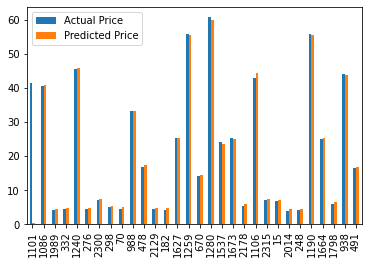

In [ ]:
graph.plot(kind='bar')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree= 2) 
X_poly_train= poly_regs.fit_transform(X_train)
X_poly_test= poly_regs.fit_transform(X_test)
pr_model = LinearRegression() 
pr_model.fit(X_poly_train,y_train)

LinearRegression()

In [ ]:
pr_model.score(X_poly_test,y_test)

0.958084386504545

In [ ]:
predt2 = pr_model.predict(X_poly_test)

In [ ]:
dfr2 = pd.DataFrame({'Actual Price': y_test,'Predicted Price': predt2})

In [ ]:
print(dfr2)

      Actual Price  Predicted Price
1101          41.3         0.965401
1086          40.5        41.121596
1989           4.1         4.762222
332            4.5         5.126609
1240          45.6        45.735487
...            ...              ...
125            4.1         4.755089
1093          39.6        40.297498
2666          28.6        27.691066
1686          24.4        23.882045
1959           4.1         4.712732

[693 rows x 2 columns]


In [ ]:
graph1 = dfr2.head(30)

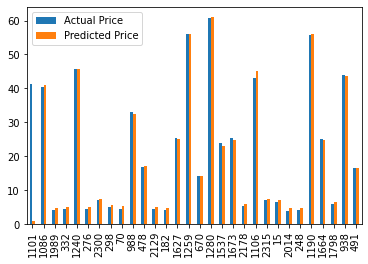

In [ ]:
graph1.plot(kind = 'bar')